### Classificação usando K vizinhos mais próximos (do ingês: K nearest neighboors – KNN)

determinar o rótulo de classificação de uma amostra baseado nas amostras vizinhas advindas de um conjunto de treinamento.

fonte: http://www.computacaointeligente.com.br/algoritmos/knn-k-vizinhos-mais-proximos/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt

usaremos um dataset Iris de classificação de um género de plantas com flor disponivel no nosso github, para obtermos os valores de X e y e assim realizar nossa classificação.

In [2]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento',
           'petal_largura','tipo']
dataset = pd.read_csv('iris-dataset.csv',names=columns)

In [3]:
dataset.head(10)

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


No grafico abaixo podemos ver a relação entre 

Aqui vamos separar o dataset em X e y.

In [4]:
X = dataset.values[:,:-1]
y = dataset.values[:,-1]

Abaixo podemos ver um gráfico com a separação de cada rótulo a partir das características sepal largura e sepal comprimento, caso uma nova amostra entre no conjunto de dados será calculado em base nos dados já existentes a distancia entre esse novo dado e os dados no conjunto, pegar os valores k mais próximos a ele e a partir deles, analisando aquele dado que mais se repetem na amostra de K's.


Gif com os passos do KNN: https://drive.google.com/open?id=1dra3Y9uD3wzTD5Uq1CTEn1FOqBNmQD7I
![](https://drive.google.com/uc?id=1dra3Y9uD3wzTD5Uq1CTEn1FOqBNmQD7I)

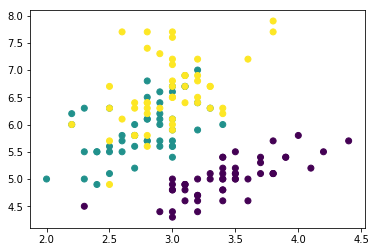

In [5]:
y_map = {label: idx for idx, label in enumerate(np.unique(dataset['tipo']))}
plt.scatter(dataset['sepal_largura'], dataset['sepal_comprimento'], c=dataset['tipo'].map(y_map))

Vamos dividir os valores de X e y em treino e teste usando a estratificação dos dados em y, que foi explicado no video [Divisão estratificada do conjunto de dados em conjunto de treino e conjunto de teste](https://www.youtube.com/watch?v=YAtWvpMhQMU)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=3)

Aqui vamos efetivamente criar, treinar e testa o modelo.

In [11]:
model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

In [8]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [9]:
y_pred = model.predict(X_test)

Para entendermos como está o funcionamento vamos calcular a Precisão do modelo.

In [10]:
mt.accuracy_score(y_test, y_pred)

0.9833333333333333